In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
DC_property = pd.read_csv('datasets/DC_Properties.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
DC_property.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [4]:
DC_property.drop(['STORIES','NUM_UNITS', 'SALEDATE','Unnamed: 0', 'SALE_NUM', 'QUALIFIED', 'BLDG_NUM'],
                 axis=1,
                 inplace = True)

In [8]:
DC_properties = DC_property[DC_property['PRICE'].notnull()]
DC_properties.shape

(98216, 42)

In [9]:
DC_properties_df = DC_properties[DC_properties['BEDRM']!= 0]
DC_properties_df.shape

(94405, 42)

In [13]:
DC_properties_df_AGAIN = DC_properties_df[DC_properties_df['BATHRM']!= 0]
DC_properties_df_AGAIN.shape

(94399, 42)

In [14]:
DC_properties_final = DC_properties_df_AGAIN[DC_properties_df_AGAIN['PRICE']!= 0]
DC_properties_final.shape

(94399, 42)

In [15]:
DC_properties_final.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL',
       'EYB', 'PRICE', 'GBA', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL',
       'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA',
       'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA', 'FULLADDRESS',
       'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE', 'LONGITUDE',
       'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK',
       'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [36]:
DC_properties_cleaner = DC_properties_final[(DC_properties_final['BEDRM'] >=0) & (DC_properties_final['BEDRM'] <=12)]

In [37]:
DC_properties_cleanest = DC_properties_cleaner[DC_properties_cleaner['PRICE']<=50000000]

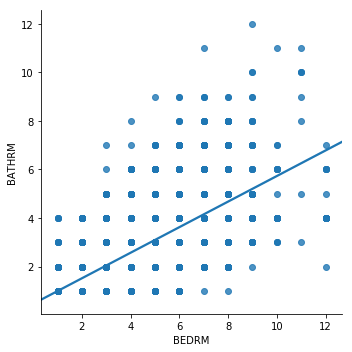

In [38]:
sns.lmplot(x='BEDRM',y='BATHRM',data=DC_properties_cleanest)

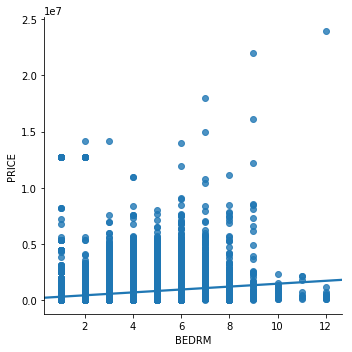

In [39]:
sns.lmplot(x='BEDRM',y='PRICE',data=DC_properties_cleanest)
#would need to remove the outliers (around 0.6 price and 1.4 price, and get rid of anything more than 10 rooms)

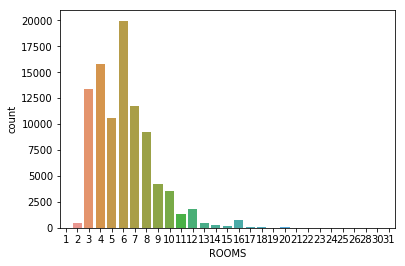

In [40]:
sns.countplot(x='ROOMS', data=DC_properties_cleanest)